In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv("cs.csv")

In [7]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

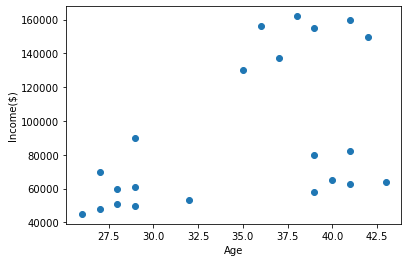

In [8]:
plt.scatter(data[["Age"]], data[["Income($)"]])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [9]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(data.iloc[:, 1:])
#y_predicted = km.fit_predict(data[["Age", "Income($)"]])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [10]:
data["cluster"] = y_predicted
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


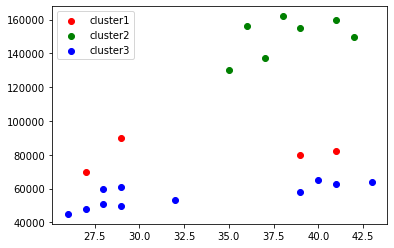

In [11]:
c1 = data[data["cluster"]==0]
c2 = data[data["cluster"]==1]
c3 = data[data["cluster"]==2]

plt.scatter(c1["Age"], c1["Income($)"], color="red", label="cluster1")
plt.scatter(c2["Age"], c2["Income($)"], color="green", label="cluster2")
plt.scatter(c3["Age"], c3["Income($)"], color="blue", label="cluster3")

plt.legend()

In [12]:
sc = MinMaxScaler()
#sc.fit(data[["Age"]])
#data["Age"] = sc.transform(data[["Age"]])
data["Age"] = sc.fit_transform(data[["Age"]])
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,70000,0
1,Michael,0.176471,90000,0
2,Mohan,0.176471,61000,2
3,Ismail,0.117647,60000,2
4,Kory,0.941176,150000,1


In [13]:
sc.fit(data[["Income($)"]])
data["Income($)"] = sc.transform(data[["Income($)"]])
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[["Age","Income($)"]])
data["cluster"] = y_predicted

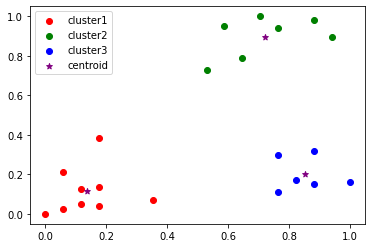

In [15]:

c1 = data[data["cluster"]==0]
c2 = data[data["cluster"]==1]
c3 = data[data["cluster"]==2]

plt.scatter(c1.iloc[:,1], c1.iloc[:, 2], color="red", label="cluster1")
plt.scatter(c2["Age"], c2["Income($)"], color="green", label="cluster2")
plt.scatter(c3["Age"], c3["Income($)"], color="blue", label="cluster3")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="purple", label="centroid", marker="*")
plt.legend()


In [16]:
data["Age"].head()

0    0.058824
1    0.176471
2    0.176471
3    0.117647
4    0.941176
Name: Age, dtype: float64

In [17]:
data[["Age"]].head()

,Age
0,0.058824
1,0.176471
2,0.176471
3,0.117647
4,0.941176


In [19]:
data.iloc[:5,1]

0    0.058824
1    0.176471
2    0.176471
3    0.117647
4    0.941176
Name: Age, dtype: float64

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(data["Age"], data["Income($)"])

ValueError: continuous is not supported